## Basic Plotting with matplotlib

Now in previous versions of matplotlib we would use a backend specific for Jupyter called `nbagg`. But things have changed, and now we use an inline backend engine. Now, you don't really need to know the details of this, but it's helpful to know that you can investigate if you want to. Let's import matplotlib and check which backend we will be using.

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

Ok, we're going to start our plotting journey by making a graph using the `plot` function. A plot has two axes, an x-axis along the horizon, and a y-axis which runs vertically.

First, let's import the pyplot scripting layer as `plt`. All of the functions which will run against the Pyplot module are part of the scripting layer of the architecture. Let's take a look at the plot function by looking at the docstring.

In [2]:
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Ok, that's a lot of documentation! If you're not used to seeing it, this Python function declaration with two arguments, the star args, and the double star kwargs can be a bit obscure. What's being said here by the star args is that the function supports any number of unnamed arguments. The double star keyword args also means that it supports any number of named arguments. This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not, but it makes it difficult to know what is an appropriate argument. Reading on, we see that the arguments will be interpreted as x, y pairs.

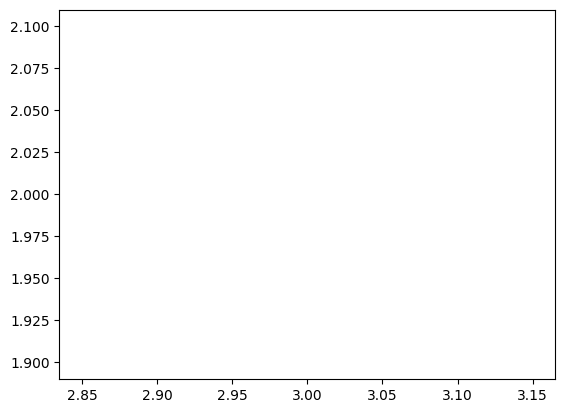

In [3]:
# So let's try with just one data point at position 3,2. The return value is the plot itself

plt.plot(3,2)

We don't see the data points though, which is a bit odd. It turns out that the third argument to `plot` should be a string which signifies how we want that data point to be rendered. Let's use a period for a dot, and we'll see that our data point shows up.

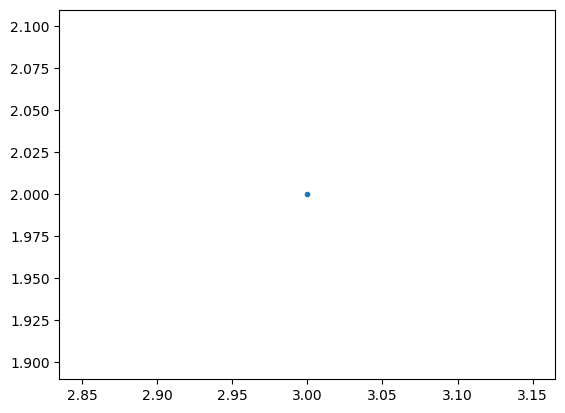

In [4]:
# The docs tell us what the different characters will render like, here we're just going to use a full stop for the marker

plt.plot(3,2,'.')

You'll notice that the subsequent calls to plot have not updated our previous visualization. The backend we are using is not interactive, so subsequent calls create new plots as new cells in the notebook, and this is a handy way to iteratively explore your data.

Here's where some of the confusion with matplotlib as a library tends to come from. In the last lecture, I explained that there's an Artist layer, and that it is figures with subplots and axes and data points, which are rendered as patches onto these axes, but we haven't seen any of that here. Instead, we just called one function on a module named plot, so what's going on? The pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the pyplot module itself has a function which is called plot, but it redirects calls to this function to the current axes object. This makes for a significant learning curve, and you'll see many discussions in web tutorials, and Stack Overflow, where people are confused by these two different approaches to making figures show up.

In data science workflows I think it's much more common to use the scripting layer, like we just did. But it's worth it to take a look at a the alternative object approach that's a bit more verbose. Actually, while some would call it the matplotlib object API, I think it's more accurate to think of it as directly interfacing with the Artist layer instead. 

In [8]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()  # Create a new empty figure
canvas = FigureCanvasAgg(fig)   # associate this figure with the canvas backend

ax = fig.add_subplot(111)  # add a subplot directly number 111 actually means that we just want one plot.

ax.plot(3,2,'.')

